<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg">
    
## <center> [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course
Authors: [Olga Daykhovskaya](https://www.linkedin.com/in/odaykhovskaya/), [Yury Kashnitsky](https://yorko.github.io/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #7 (demo)
## <center> Unsupervised learning

In this task, we will look at how data dimensionality reduction and clustering methods work. At the same time, we'll practice solving classification task again.

We will work with the [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dataset. Download the data [here](https://drive.google.com/file/d/14RukQ0ylM2GCdViUHBBjZ2imCaYcjlux/view?usp=sharing). The data comes from accelerometers and gyros of Samsung Galaxy S3 mobile phones ( you can find more info about the features using the link above), the type of activity of a person with a phone in his/her pocket is also known – whether he/she walked, stood, lay, sat or walked up or down the stairs.

First, we pretend that the type of activity is unknown to us, and we will try to cluster people purely on the basis of available features. Then we solve the problem of determining the type of physical activity as a classification problem.

Fill the code where needed ("Your code is here") and answer the questions in the [web form](https://docs.google.com/forms/d/1wBf5UoRndv6PpzIwYnM9f0ysoGa4Yqcqle-HBlBP5QQ/edit).

In [109]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [110]:
# change this if necessary
PATH_TO_SAMSUNG_DATA = "../data"

In [111]:
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_test_labels.txt")).astype(int)

In [112]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

For clustering, we do not need a target vector, so we'll work with the combination of training and test samples. Merge `X_train` with `X_test`, and `y_train` with `y_test`.

In [113]:
# Your code here
y_merged = np.hstack((y_test, y_train))
x_merged = np.vstack((X_test, X_train))
x_merged.shape, y_merged.shape

((10299, 561), (10299,))

Define the number of unique values of the labels of the target class.

In [114]:
 np.unique(y_merged)

array([1, 2, 3, 4, 5, 6])

In [115]:
n_classes = np.unique(y_merged).size
n_classes

6

[These labels correspond to:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 – walking
- 2 – walking upstairs
- 3 – walking downstairs
- 4 – sitting
- 5 – standing
- 6 – laying down

Scale the sample using `StandardScaler` with default parameters.

In [185]:
# Your code here
kinder_ss  = StandardScaler() # :D
x_merged_scaled = kinder_ss.fit_transform(x_merged)


Reduce the number of dimensions using PCA, leaving as many components as necessary to explain at least 90% of the variance of the original (scaled) data. Use the scaled dataset and fix `random_state` (RANDOM_STATE constant).

In [186]:
import sklearn 
sklearn.__version__

'0.23.1'

In [189]:
# Your code here
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(x_merged_scaled)
X_pca = pca.transform(x_merged_scaled)
X_pca


array([[-10.40541198,  -1.66385599,   2.10571625, ...,   0.15176037,
          0.26376951,  -0.98192167],
       [-13.32170056,  -0.98428083,  -0.25365379, ...,   1.42592859,
          0.28222561,  -0.65332634],
       [-14.51765823,   2.45028904,  -1.45164833, ...,   0.20099135,
         -0.79546173,  -0.24222847],
       ...,
       [ 14.75412075, -12.38429554,   4.5969122 , ...,  -1.59862334,
         -0.15099076,   1.1304012 ],
       [ 13.25894289, -14.20564835,   3.51674271, ...,  -1.40366437,
         -0.42584022,   1.16803917],
       [ 13.38991833, -12.36358361,   1.75755273, ...,   0.19215572,
         -0.16178555,  -0.30548375]])

**Question 1:** <br>


What is the minimum number of principal components required to cover the 90% of the variance of the original (scaled) data?

In [191]:
# Your code here 
pca.n_components_, X_pca.shape 

(65, (10299, 65))

**Answer options:**
- 56 
- 65 --
- 66
- 193

**Question 2:**<br>
What percentage of the variance is covered by the first principal component? Round to the nearest percent.

**Answer options:**
- 45
- 51 --
- 56
- 61 

In [193]:
round(pca.explained_variance_ratio_[0],2)

0.51

Visualize data in projection on the first two principal components.

In [194]:
print(plt.cm.viridis(0))

(0.267004, 0.004874, 0.329415, 1.0)


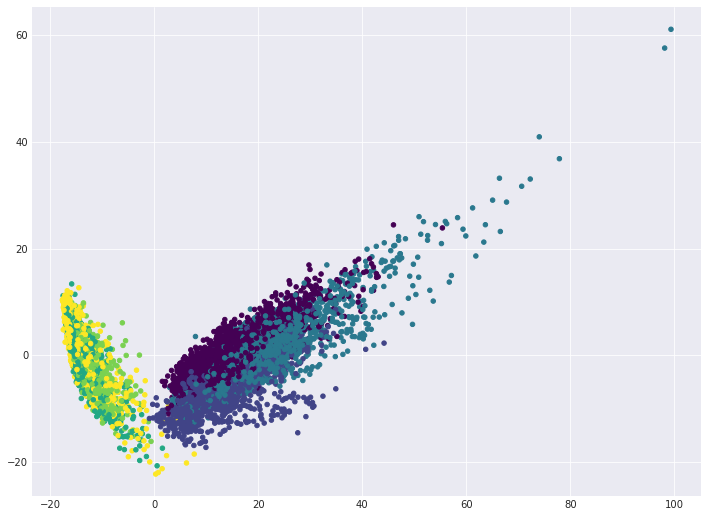

In [195]:
# Your code here
#
plt.scatter(X_pca[:,0], X_pca[:,1] , c=y_merged, s=20, cmap='viridis');

**Question 3:**<br>
If everything worked out correctly, you will see a number of clusters, almost perfectly separated from each other. What types of activity are included in these clusters? <br>

**Answer options:**
- 1 cluster: all 6 activities
- 2 clusters: (walking, walking upstairs, walking downstairs ) and (sitting, standing, laying) --
- 3 clusters: (walking), (walking upstairs, walking downstairs) and (sitting, standing, laying)
- 6 clusters

------------------------------

Perform clustering with the `KMeans` method, training the model on data with reduced dimensionality (by PCA). In this case, we will give a clue to look for exactly 6 clusters, but in general case we will not know how many clusters we should be looking for.

Options:

- **n_clusters** = n_classes (number of unique labels of the target class)
- **n_init** = 100
- **random_state** = RANDOM_STATE (for reproducibility of the result)

Other parameters should have default values.

In [123]:
# Your code here
kmeans= KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE , verbose=1)
kmeans.fit(X_pca)

Initialization complete
Iteration 0, inertia 208435.1321993365
Iteration 1, inertia 133345.30807838973
Iteration 2, inertia 129857.7571895074
Iteration 3, inertia 129059.92926301944
Iteration 4, inertia 128819.81969128962
Iteration 5, inertia 128743.95503169151
Iteration 6, inertia 128716.65215549698
Iteration 7, inertia 128706.14816372072
Iteration 8, inertia 128702.17145510761
Iteration 9, inertia 128700.44752348585
Iteration 10, inertia 128699.7006798062
Converged at iteration 10: center shift 0.00013511113382944003 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 212426.70194083184
Iteration 1, inertia 134809.27870114773
Iteration 2, inertia 131420.188975448
Iteration 3, inertia 130373.91652271664
Iteration 4, inertia 129828.13057244367
Iteration 5, inertia 129428.23457185653
Iteration 6, inertia 129117.08609160945
Iteration 7, inertia 128838.36247231359
Iteration 8, inertia 128629.94154752014
Iteration 9, inertia 128472.05246359207
Iteration 10,

Iteration 1, inertia 133616.35381525953
Iteration 2, inertia 131163.0303046383
Iteration 3, inertia 129837.92596513845
Iteration 4, inertia 128880.37398094295
Iteration 5, inertia 128316.351373899
Iteration 6, inertia 128031.88751045935
Iteration 7, inertia 127889.76131677807
Iteration 8, inertia 127824.71684393604
Iteration 9, inertia 127791.9626744447
Iteration 10, inertia 127772.92929639354
Iteration 11, inertia 127760.63778366824
Iteration 12, inertia 127752.53289762729
Iteration 13, inertia 127749.5116558655
Iteration 14, inertia 127747.16421728583
Iteration 15, inertia 127744.61679907602
Iteration 16, inertia 127742.33206222088
Iteration 17, inertia 127740.42730514733
Iteration 18, inertia 127739.76818419651
Iteration 19, inertia 127739.29517316648
Iteration 20, inertia 127739.04266416546
Converged at iteration 20: center shift 4.6175057851361394e-05 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 235995.58425841367
Iteration 1, inertia 132089

Iteration 29, inertia 127777.20827840836
Iteration 30, inertia 127770.89137659644
Iteration 31, inertia 127766.06570833124
Iteration 32, inertia 127761.42641166205
Iteration 33, inertia 127756.41842987326
Iteration 34, inertia 127753.0001730117
Iteration 35, inertia 127750.16413114585
Iteration 36, inertia 127747.5269463261
Iteration 37, inertia 127746.6206242591
Iteration 38, inertia 127744.01998835176
Iteration 39, inertia 127742.19553791532
Iteration 40, inertia 127741.32842854055
Iteration 41, inertia 127740.76603514007
Converged at iteration 41: center shift 0.00011179116674563309 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 216515.7948621623
Iteration 1, inertia 134436.46874217357
Iteration 2, inertia 129104.55509695571
Iteration 3, inertia 128146.31515924544
Iteration 4, inertia 127978.18806923385
Iteration 5, inertia 127916.1248635884
Iteration 6, inertia 127886.06797802195
Iteration 7, inertia 127865.21190017165
Iteration 8, inertia 1278

Iteration 24, inertia 128725.3075043652
Iteration 25, inertia 128278.83174174343
Iteration 26, inertia 128045.01340046273
Iteration 27, inertia 127904.16462889282
Iteration 28, inertia 127822.79961762248
Iteration 29, inertia 127791.40941307995
Iteration 30, inertia 127773.9887553967
Iteration 31, inertia 127761.64882043104
Iteration 32, inertia 127753.10630263283
Iteration 33, inertia 127748.89183772834
Iteration 34, inertia 127746.9346047937
Iteration 35, inertia 127744.99168593186
Iteration 36, inertia 127742.84099998916
Iteration 37, inertia 127741.00287970115
Iteration 38, inertia 127740.1219317527
Iteration 39, inertia 127739.60957994207
Iteration 40, inertia 127739.15436363414
Converged at iteration 40: center shift 4.648594080304204e-05 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 217397.79703512508
Iteration 1, inertia 131917.2489996551
Iteration 2, inertia 129797.6898422837
Iteration 3, inertia 128704.83603824329
Iteration 4, inertia 12

Iteration 6, inertia 130966.26376810756
Iteration 7, inertia 130104.64174920261
Iteration 8, inertia 129360.4930110532
Iteration 9, inertia 128742.78407360958
Iteration 10, inertia 128351.7697271083
Iteration 11, inertia 128158.2435206196
Iteration 12, inertia 128048.28532595017
Iteration 13, inertia 127980.0635451573
Iteration 14, inertia 127925.59623990749
Iteration 15, inertia 127879.8952422631
Iteration 16, inertia 127835.30348741655
Iteration 17, inertia 127803.97789295876
Iteration 18, inertia 127790.35906833145
Iteration 19, inertia 127784.37115978294
Iteration 20, inertia 127777.28405909604
Iteration 21, inertia 127770.20878091965
Iteration 22, inertia 127764.60152409539
Iteration 23, inertia 127759.06344761692
Iteration 24, inertia 127755.1039812657
Iteration 25, inertia 127751.67032265612
Iteration 26, inertia 127748.14527684766
Iteration 27, inertia 127747.24106678831
Iteration 28, inertia 127745.86654390575
Iteration 29, inertia 127742.74217197462
Iteration 30, inertia 1277

Iteration 22, inertia 127799.96142655807
Iteration 23, inertia 127792.88799500429
Iteration 24, inertia 127787.67529517789
Iteration 25, inertia 127783.4477088432
Iteration 26, inertia 127777.38139202949
Iteration 27, inertia 127771.06449021758
Iteration 28, inertia 127766.23882195237
Iteration 29, inertia 127761.59952528319
Iteration 30, inertia 127756.59154349439
Iteration 31, inertia 127753.17328663284
Iteration 32, inertia 127750.33724476697
Iteration 33, inertia 127747.70005994725
Iteration 34, inertia 127746.79373788025
Iteration 35, inertia 127744.19310197292
Iteration 36, inertia 127742.36865153645
Iteration 37, inertia 127741.5015421617
Iteration 38, inertia 127740.9391487612
Converged at iteration 38: center shift 0.00011179116674564141 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 224621.64939578195
Iteration 1, inertia 134590.7577144901
Iteration 2, inertia 130933.49209447848
Iteration 3, inertia 129374.31399925641
Iteration 4, inertia

Iteration 56, inertia 130072.34067745063
Iteration 57, inertia 130070.9188115963
Iteration 58, inertia 130069.91993603195
Iteration 59, inertia 130068.9239165094
Iteration 60, inertia 130067.92930256501
Iteration 61, inertia 130065.77873297736
Iteration 62, inertia 130062.62010209549
Iteration 63, inertia 130059.3545261273
Iteration 64, inertia 130052.46566923283
Iteration 65, inertia 130043.28295718283
Iteration 66, inertia 130025.57436642777
Iteration 67, inertia 129996.10978844817
Iteration 68, inertia 129944.20552120321
Iteration 69, inertia 129861.2779906502
Iteration 70, inertia 129733.72000383638
Iteration 71, inertia 129449.47035707661
Iteration 72, inertia 129027.43878881965
Iteration 73, inertia 128574.6579881339
Iteration 74, inertia 128258.23782724096
Iteration 75, inertia 128099.65435944487
Iteration 76, inertia 128016.75884637376
Iteration 77, inertia 127954.25176756585
Iteration 78, inertia 127912.49492109519
Iteration 79, inertia 127876.57655292707
Iteration 80, inertia

Iteration 13, inertia 129680.18743469863
Iteration 14, inertia 129412.84100037385
Iteration 15, inertia 129158.95090418289
Iteration 16, inertia 128970.54593002918
Iteration 17, inertia 128806.52851766995
Iteration 18, inertia 128630.76238742057
Iteration 19, inertia 128490.1352128689
Iteration 20, inertia 128390.77495820545
Iteration 21, inertia 128322.98282231152
Iteration 22, inertia 128258.01226173602
Iteration 23, inertia 128187.79734378232
Iteration 24, inertia 128117.9455096781
Iteration 25, inertia 128043.8294392564
Iteration 26, inertia 127983.56452309382
Iteration 27, inertia 127932.64400055034
Iteration 28, inertia 127900.42691847436
Iteration 29, inertia 127877.34918956805
Iteration 30, inertia 127862.33841437861
Iteration 31, inertia 127851.60057624447
Iteration 32, inertia 127842.85925948634
Iteration 33, inertia 127835.51885708522
Iteration 34, inertia 127826.4607368033
Iteration 35, inertia 127815.69527138828
Iteration 36, inertia 127806.74480483292
Iteration 37, inerti

Iteration 6, inertia 127875.12622142282
Iteration 7, inertia 127859.17157890821
Iteration 8, inertia 127848.86793967895
Iteration 9, inertia 127842.39579902643
Iteration 10, inertia 127837.34561891506
Iteration 11, inertia 127830.09635142097
Iteration 12, inertia 127818.69705741716
Iteration 13, inertia 127804.7269953507
Iteration 14, inertia 127793.35674764845
Iteration 15, inertia 127787.6544711725
Iteration 16, inertia 127781.84119111777
Iteration 17, inertia 127774.18254900446
Iteration 18, inertia 127766.20961821338
Iteration 19, inertia 127758.9856289183
Iteration 20, inertia 127752.56199183672
Iteration 21, inertia 127747.30305277414
Iteration 22, inertia 127744.54430201356
Iteration 23, inertia 127742.74282686925
Iteration 24, inertia 127741.4334521131
Iteration 25, inertia 127740.77846752491
Iteration 26, inertia 127740.24580548603
Iteration 27, inertia 127739.58227378772
Iteration 28, inertia 127739.19301078506
Converged at iteration 28: center shift 5.0503242050454144e-05 wi

Iteration 8, inertia 130836.20674462404
Iteration 9, inertia 130803.92465136632
Iteration 10, inertia 130775.08052294042
Iteration 11, inertia 130751.72245290231
Iteration 12, inertia 130721.48426602395
Iteration 13, inertia 130665.95073324462
Iteration 14, inertia 130565.15264253969
Iteration 15, inertia 130415.27095632191
Iteration 16, inertia 130099.64576152692
Iteration 17, inertia 129524.51811636829
Iteration 18, inertia 128832.90227129158
Iteration 19, inertia 128356.3709346287
Iteration 20, inertia 128100.12254753089
Iteration 21, inertia 127948.44287851993
Iteration 22, inertia 127859.20122537111
Iteration 23, inertia 127819.97290847429
Iteration 24, inertia 127796.54169748667
Iteration 25, inertia 127779.86625935107
Iteration 26, inertia 127767.79926359044
Iteration 27, inertia 127758.41793924641
Iteration 28, inertia 127755.04127923163
Iteration 29, inertia 127751.97811645607
Iteration 30, inertia 127746.72979613468
Iteration 31, inertia 127743.7408756561
Iteration 32, inerti

Iteration 39, inertia 127739.15436363414
Converged at iteration 39: center shift 4.6485940803039626e-05 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 218340.559530291
Iteration 1, inertia 136429.41615887108
Iteration 2, inertia 130913.26637133512
Iteration 3, inertia 129621.57596430836
Iteration 4, inertia 129263.28068628474
Iteration 5, inertia 129053.67490525334
Iteration 6, inertia 128866.26899349166
Iteration 7, inertia 128768.3241646146
Iteration 8, inertia 128733.23877003625
Iteration 9, inertia 128714.35343802674
Iteration 10, inertia 128704.55214975677
Iteration 11, inertia 128700.75798635543
Iteration 12, inertia 128699.55701131956
Iteration 13, inertia 128699.20940975302
Converged at iteration 13: center shift 4.761090111687699e-05 within tolerance 0.00013589132529489664
Initialization complete
Iteration 0, inertia 218838.47453415822
Iteration 1, inertia 133909.26754953057
Iteration 2, inertia 131463.18740595374
Iteration 3, inertia 1301

Iteration 3, inertia 128390.12465893592
Iteration 4, inertia 128221.9857950644
Iteration 5, inertia 128097.3062106654
Iteration 6, inertia 127999.22994785153
Iteration 7, inertia 127924.32895741946
Iteration 8, inertia 127888.83838963721
Iteration 9, inertia 127867.0225968668
Iteration 10, inertia 127851.16209884419
Iteration 11, inertia 127842.04993158097
Iteration 12, inertia 127832.18182693014
Iteration 13, inertia 127821.77111386522
Iteration 14, inertia 127811.10405718307
Iteration 15, inertia 127802.20126248672
Iteration 16, inertia 127794.45431953296
Iteration 17, inertia 127788.50952100148
Iteration 18, inertia 127784.10296868272
Iteration 19, inertia 127779.19279785301
Iteration 20, inertia 127771.86145111264
Iteration 21, inertia 127766.1601491466
Iteration 22, inertia 127761.59952528319
Iteration 23, inertia 127756.59154349439
Iteration 24, inertia 127753.17328663285
Iteration 25, inertia 127750.33724476698
Iteration 26, inertia 127747.70005994725
Iteration 27, inertia 12774

KMeans(n_clusters=6, n_init=100, random_state=17, verbose=1)

Visualize data in projection on the first two principal components. Color the dots according to the clusters obtained.

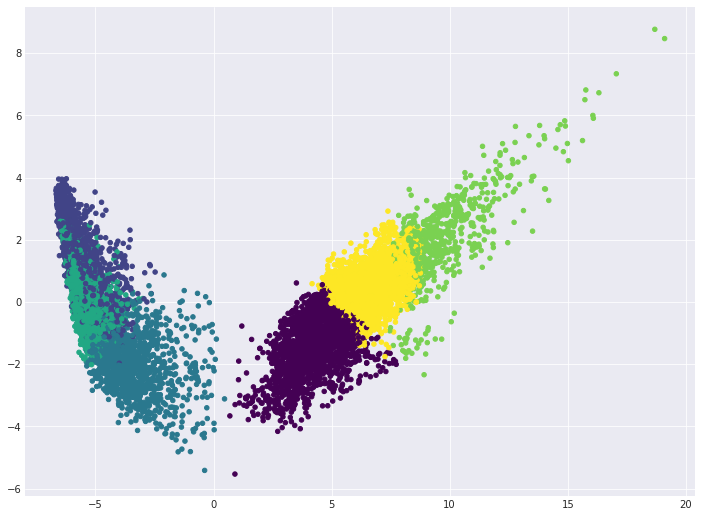

In [124]:
# Your code here
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, s=20, cmap='viridis');


Look at the correspondence between the cluster marks and the original class labels and what kinds of activities the `KMeans` algorithm is confused at.

In [196]:
tab = pd.crosstab(y_merged, kmeans.labels_, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,707,0,0,0,150,865,1722
going up the stairs,1171,0,0,0,82,291,1544
going down the stairs,188,0,0,0,456,762,1406
sitting,3,49,470,1255,0,0,1777
standing,0,0,666,1240,0,0,1906
laying,12,1759,173,0,0,0,1944
all,2081,1808,1309,2495,688,1918,10299


We see that for each class (i.e., each activity) there are several clusters. Let's look at the maximum percentage of objects in a class that are assigned to a single cluster. This will be a simple metric that characterizes how easily the class is separated from others when clustering.

Example: if for class "walking downstairs" (with 1406 instances belonging to it), the distribution of clusters is:
 - cluster 1 - 900
 - cluster 3 - 500
 - cluster 6 - 6,
 
then such a share will be 900/1406 $ \approx $ 0.64.
 

**Question 4:** <br>
Which activity is separated from the rest better than others based on the simple metric described above? <br>

**Answer:**
- walking
- standing
- walking downstairs
- all three options are incorrect -- because __laying__ it is

In [197]:
tab = pd.crosstab(y_merged, kmeans.labels_, normalize='index')
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] #+ ['all']
pd.DataFrame(tab).style.highlight_max(color = 'lightgreen',  axis = 0) 

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6
walking,0.410569,0.000000,0.000000,0.000000,0.087108,0.502323
going up the stairs,0.758420,0.000000,0.000000,0.000000,0.053109,0.188472
going down the stairs,0.133713,0.000000,0.000000,0.000000,0.324324,0.541963
sitting,0.001688,0.027575,0.264491,0.706246,0.000000,0.000000
standing,0.000000,0.000000,0.349423,0.650577,0.000000,0.000000
laying,0.006173,0.904835,0.088992,0.000000,0.000000,0.000000


It can be seen that kMeans does not distinguish activities very well. Use the elbow method to select the optimal number of clusters. Parameters of the algorithm and the data we use are the same as before, we change only `n_clusters`.

In [198]:
# # Your code here
inertia = []
for i in range(2,10):
    i_kmean = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=300)
    i_kmean.fit(X_pca)
    inertia.append(np.sqrt(i_kmean.inertia_))
inertia


[1642.5366839830021,
 1531.804525500845,
 1485.641998874196,
 1442.5621645410563,
 1415.4349449680913,
 1395.0637266546466,
 1375.5725208225024,
 1357.0857231486302]

In [205]:
k=[]
for i in range(1, len(inertia)-1):
    kk = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    k.append(kk)
    print(str(kk))

np.argmin(k) + 2 + 1 # 2 for cluster start padding 

0.4168845551230508
0.933220893248725
0.6296964691922488
0.7509512082007312
0.9568011854882748
0.9484686495580658


3

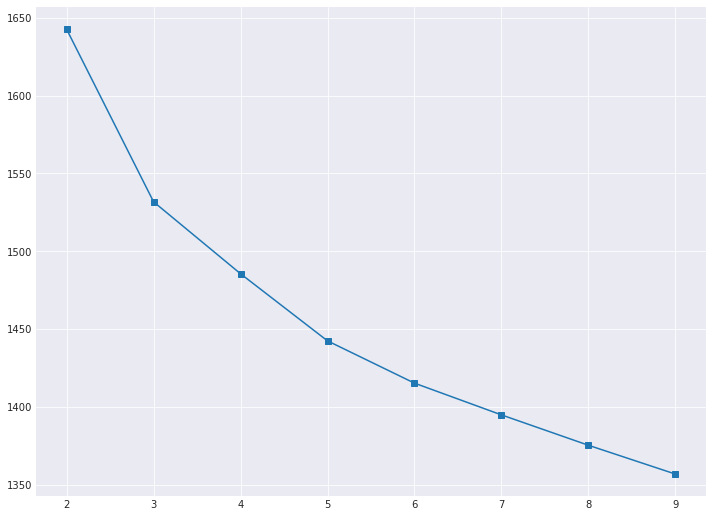

In [206]:
plt.plot(range(2, 10), inertia, marker='s');

**Question 5:** <br>
How many clusters can we choose according to the elbow method? <br>

**Answer options:**
- 1
- 2 
- 3 --
- 4 

------------------------

Let's try another clustering algorithm, described in the article – agglomerative clustering.

In [207]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

Calculate the Adjusted Rand Index (`sklearn.metrics`) for the resulting clustering and for ` KMeans` with the parameters from the 4th question.

In [208]:
# Your code here
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(ag.labels_,y_merged), adjusted_rand_score(kmeans.labels_,y_merged)




(0.49362763373004886, 0.4611895437712847)

**Question 6:** <br>
Select all the correct statements. <br>

**Answer options:**
- According to ARI, KMeans handled clustering worse than Agglomerative Clustering --
- For ARI, it does not matter which tags are assigned to the cluster, only the partitioning of instances into clusters matters --
- In case of random partitioning into clusters, ARI will be close to zero --

очень помогает статья https://en.wikipedia.org/wiki/Rand_index

-------------------------------

You can notice that the task is not very well solved when we try to detect several clusters (> 2). Now, let's solve the classification problem, given that the data is labeled.

For classification, use the support vector machine – class `sklearn.svm.LinearSVC`. In this course, we did study this algorithm separately, but it is well-known and you can read about it, for example [here](http://cs231n.github.io/linear-classify/#svmvssoftmax).

Choose the `C` hyperparameter for` LinearSVC` using `GridSearchCV`.

- Train the new `StandardScaler` on the training set (with all original features), apply scaling to the test set
- In `GridSearchCV`, specify `cv` = 3.

In [209]:
# # Your code here
from sklearn.model_selection import train_test_split
x_merged_scaled = StandardScaler().fit_transform(x_merged)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_merged_scaled, y_merged,random_state=RANDOM_STATE, test_size=0.3 )

In [210]:
%%time
svc = LinearSVC(random_state=RANDOM_STATE,max_iter=100000, )
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
gs_svc = GridSearchCV(svc,param_grid=params, cv=3, n_jobs=5 )
gs_svc.fit(x_train_scaled, y_train)
gs_svc

Wall time: 57.6 s


GridSearchCV(cv=3, estimator=LinearSVC(max_iter=100000, random_state=17),
             n_jobs=5, param_grid={'C': [0.0001, 0.1, 0.5, 1, 10]})

In [211]:
best_svc = gs_svc.best_estimator_

In [212]:
gs_svc.best_params_, gs_svc.best_score_

({'C': 0.1}, 0.9829379941739492)

**Question 7**<br>
Which value of the hyperparameter `C` was chosen the best on the basis of cross-validation? <br>

**Answer options:**
- 0.001
- 0.01 
- 0.1 -
- 1
- 10

In [214]:
y_predicted = gs_svc.predict(x_test_scaled)

In [215]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['walking', 'climbing up the stairs',
              'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
              'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,laying,all
walking,544,1,0,0,0,0,545
climbing up the stairs,1,465,0,0,1,0,467
going down the stairs,0,0,421,0,0,0,421
sitting,0,0,0,477,29,1,507
standing,0,0,0,32,540,0,572
laying,0,0,0,0,0,578,578
all,545,466,421,509,570,579,3090


**Question 8:** <br>
Which activity type is worst detected by SVM in terms of precision? Recall?<br>

**Answer options:**
- precision – going up the stairs, recall – laying
- precision – laying, recall – sitting
- precision – walking, recall – walking
- precision – standing, recall – sitting --

In [216]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       545
           2       1.00      1.00      1.00       467
           3       1.00      1.00      1.00       421
           4       0.94      0.94      0.94       507
           5       0.95      0.94      0.95       572
           6       1.00      1.00      1.00       578

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



Finally, do the same thing as in Question 7, but add PCA.

- Use `X_train_scaled` and` X_test_scaled`
- Train the same PCA as before, on the scaled training set, apply scaling to the test set
- Choose the hyperparameter `C` via cross-validation on the training set with PCA-transformation. You will notice how much faster it works now.

**Question 9:** <br>
What is the difference between the best quality (accuracy) for cross-validation in the case of all 561 initial characteristics and in the second case, when the principal component method was applied? Round to the nearest percent. <br>

**Answer options:**
- quality is the same
- 2%
- 4% --
- 10%
- 20%

In [217]:
# Your code here
pca  = PCA(random_state=RANDOM_STATE, n_components=0.9)
pca.fit(np.vstack((x_train_scaled,x_test_scaled)))
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)
x_train_scaled_pca.shape, x_test_scaled_pca.shape


((7209, 65), (3090, 65))

In [220]:
y_train.shape
newsvc = LinearSVC(random_state=RANDOM_STATE,max_iter=100000,C=0.1 )

newsvc.fit(x_train_scaled_pca, y_train)
y_predicted_new = newsvc.predict(x_test_scaled_pca)


In [221]:
from sklearn.metrics import accuracy_score
round(np.abs(accuracy_score(y_test, y_predicted) - accuracy_score(y_test, y_predicted_new)),4)

0.0398

**Question 10:** <br>
Select all the correct statements:

**Answer options:**
- Principal component analysis in this case allowed to reduce the model training time, while the quality (mean cross-validation accuracy) suffered greatly, by more than 10%
- PCA can be used to visualize data, but there are better methods for this task, for example, tSNE. However, PCA has lower computational complexity --
- PCA builds linear combinations of initial features, and in some applications they might be poorly interpreted by humans --